# Challenge 3

In [45]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [4]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### Explore the titanic dataset using Pandas dtypes

In [5]:
#your code here
titanic.dtypes


PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [6]:
# your code here- numerical variable
titanic.select_dtypes(include=['int64','float64'])


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [7]:
#your code here- categorical variable
titanic.select_dtypes(include='object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

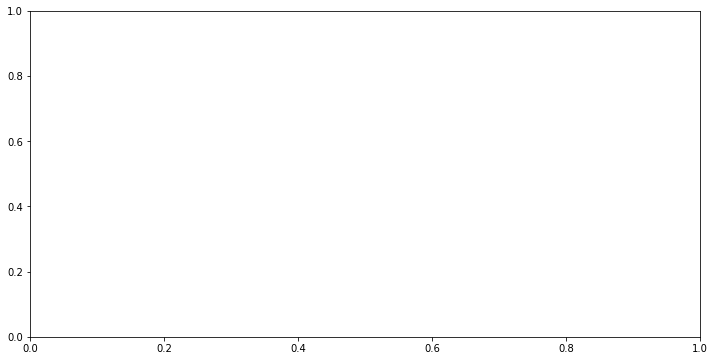

In [8]:
# your code here
fig, x1 = plt.subplots(figsize=(12,6))
plt.show()

#### Use the appropriate visulalization to show the distribution of the column `Age`

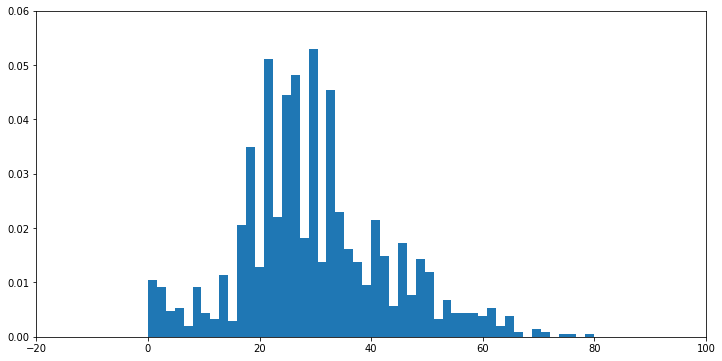

In [9]:
# your code here
fig, x1 = plt.subplots(figsize=(12,6))
x = titanic['Age'].astype(int)
bins = 50
x1.hist(x, bins=bins, density=True)
plt.style.use('classic')
plt.show()


#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

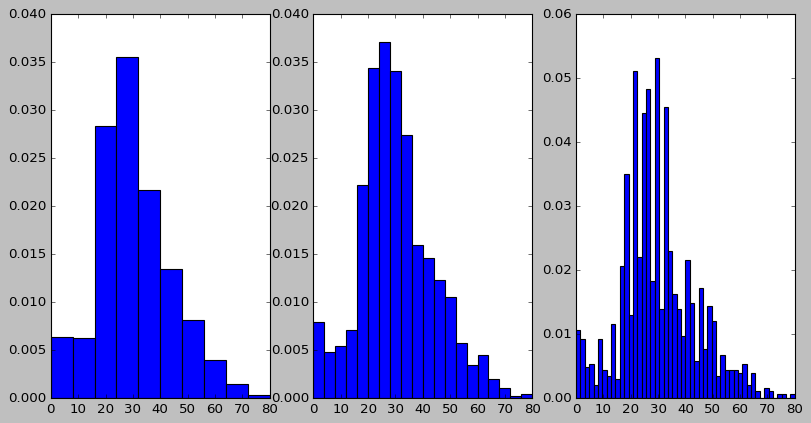

In [11]:
# your code here
fig, (x1, x2, x3) = plt.subplots(1,3, figsize=(12,6))
x = titanic['Age'].astype(int)
x1.hist(x, bins=10, density=True)
x2.hist(x, bins=20, density=True)
x3.hist(x, bins=50, density=True)
plt.style.use('classic')
plt.show()


#### Whether the bin size affects your plot? Why?

In [2]:
#your comment here
# because is the number of boxes where you divide your data
# while more boxes more detailed distribution you get.

#### Use seaborn to show the distribution of the column `Age`

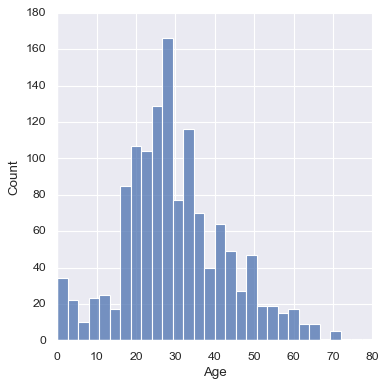

In [16]:
# your code here
x = titanic['Age'].astype(int)
sns.set_theme()
sns.displot(x)

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

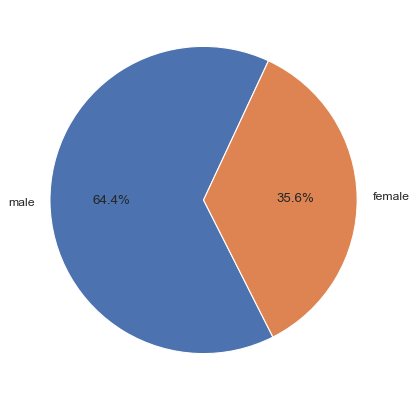

In [41]:
# your code here- 1st way
x =  titanic['Gender'].value_counts()
fig, x1 = plt.subplots()
labels = 'male','female'
x1.pie(x, labels=labels, startangle=65, autopct='%1.1f%%')
plt.show()



<AxesSubplot:xlabel='Gender', ylabel='count'>

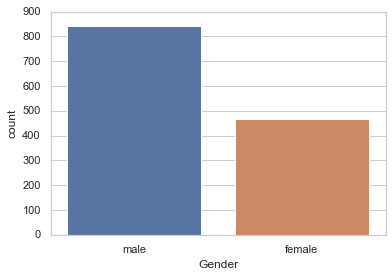

In [63]:
# your code here- 2nd way
sns.set_theme(style='whitegrid')
sns.countplot(x='Gender', data=titanic)


#### Use the appropriate plot to visualize the column `Pclass` 


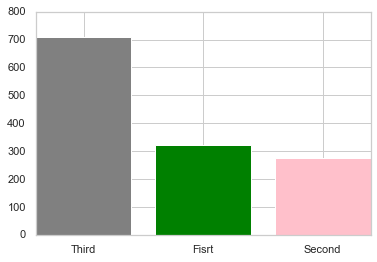

In [81]:
# your code here
x = titanic['Pclass'].value_counts()
y = ['Third','Fisrt','Second']
fig, x1 = plt.subplots()
x1.bar(y, x, color=['gray', 'green', 'pink'])
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

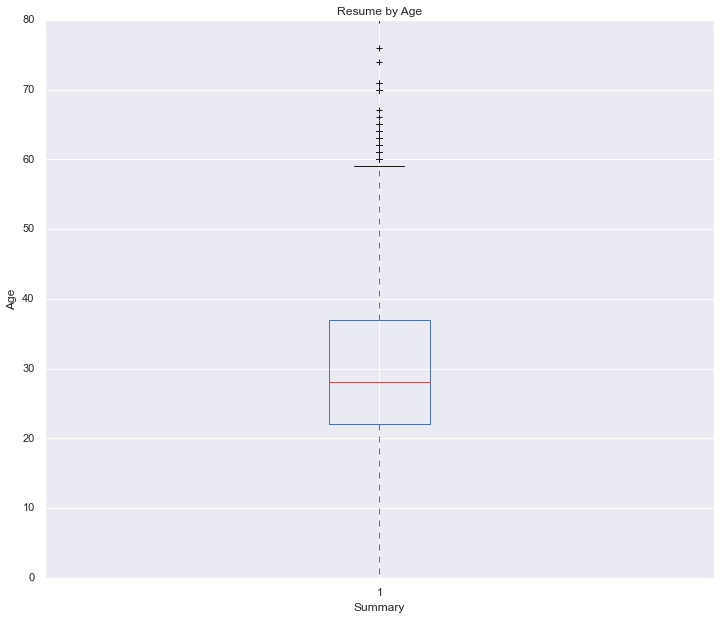

In [106]:
# your code here
x = titanic['Age'].astype(int)
fig, x1 = plt.subplots(figsize=(12,10))
x1.set_title('Resume by Age')
x1.set_ylabel('Age')
x1.set_xlabel('Summary')
x1.boxplot(x, )
plt.show()


#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here
# said that most of the passengers were between 22 and 38 years old 
# and that the passengers considered outliers were those over 59 years old.

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

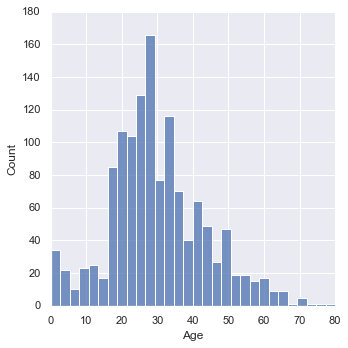

In [107]:
#your code here
x = titanic['Age'].astype(int)
sns.set_theme()
sns.displot(x)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here
# there where more than 30 babies and 50 children under 10 years of age and approximately 30 teenagers.


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

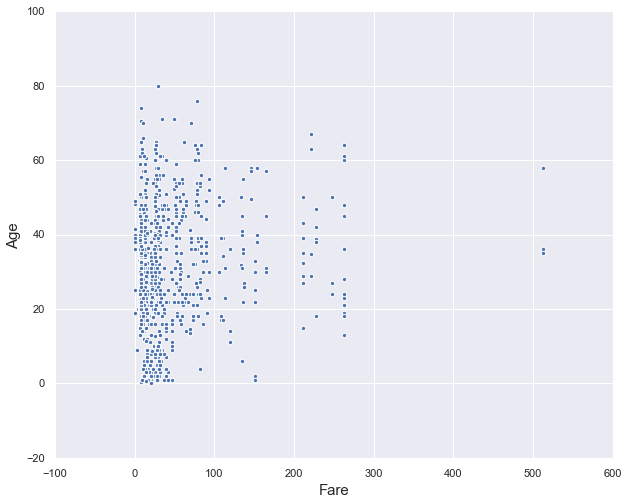

In [113]:
#your code-1st way
x = titanic['Fare']
y = titanic['Age'] 
fig, x1 = plt.subplots(figsize=(10,8))
x1.set_xlabel('Fare', fontsize=15)
x1.set_ylabel('Age', fontsize=15)
plt.scatter(x, y)


<AxesSubplot:xlabel='Fare', ylabel='Age'>

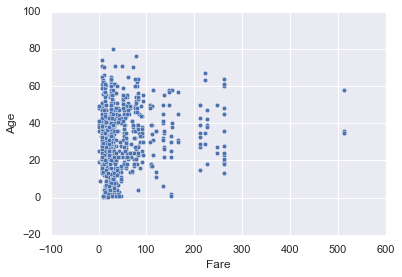

In [116]:
# your code-2nd way
sns.scatterplot(data=titanic, x='Fare', y='Age')

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

<AxesSubplot:>

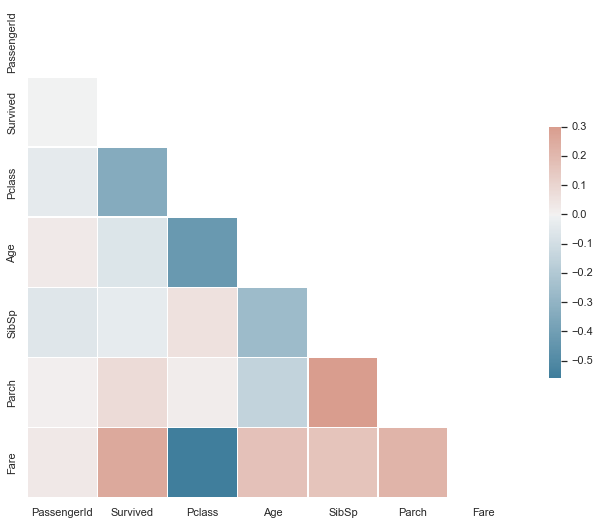

In [119]:
#your code here
sns.set_theme(style='white')
corr = titanic.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})


#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here
# Pclass-Fare - first class passengers pay more.abs
# Pclass-Age  - first class passenger are oldest
# Pclass-Survived - first class passegner survived

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

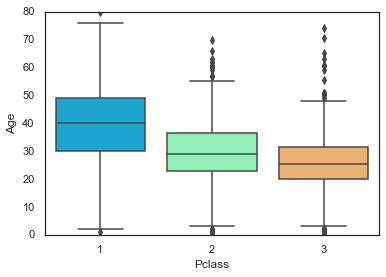

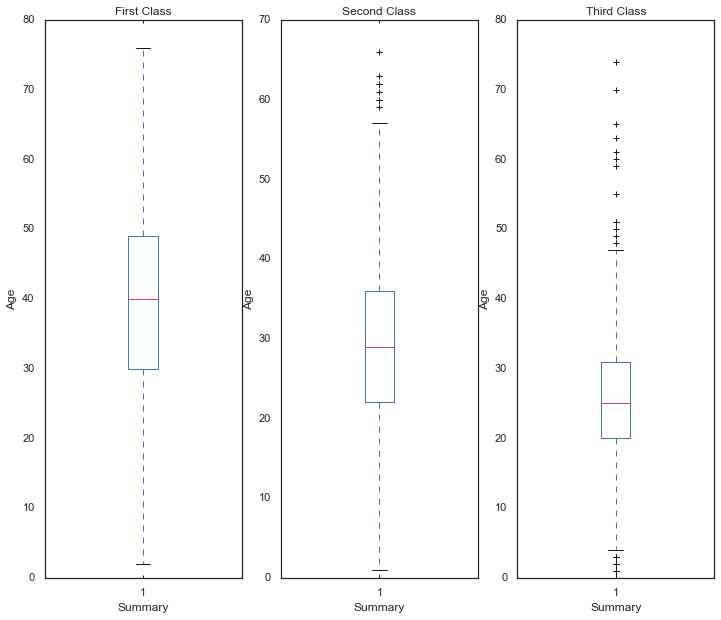

In [161]:
#your code here
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='rainbow')

fig, (x1, x2, x3) = plt.subplots(1,3, figsize=(12,10))
x = titanic['Age'][titanic['Pclass']==1].astype(int)
y = titanic['Age'][titanic['Pclass']==2].astype(int)
z = titanic['Age'][titanic['Pclass']==3].astype(int)
x1.set_title('First Class')
x1.set_ylabel('Age')
x1.set_xlabel('Summary')
x1.boxplot(x, patch_artist=True)

x2.set_title('Second Class')
x2.set_ylabel('Age')
x2.set_xlabel('Summary')
x2.boxplot(y)

x3.set_title('Third Class')
x3.set_ylabel('Age')
x3.set_xlabel('Summary')
x3.boxplot(z)

plt.show()


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

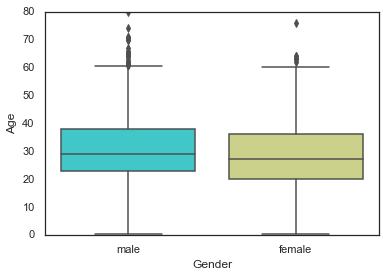

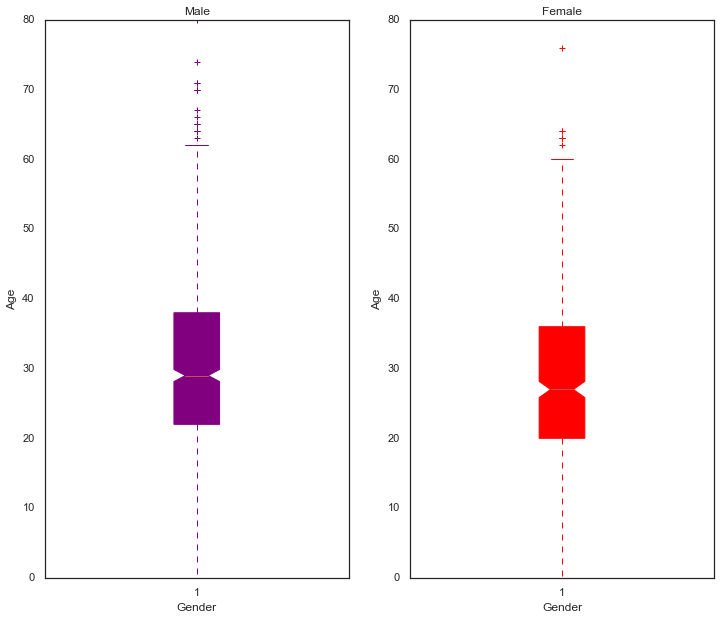

In [157]:
#your code here
sns.boxplot(x='Gender', y='Age', data=titanic, palette='rainbow')
fig, (x1, x2) = plt.subplots(1,2, figsize=(12,10))
x = titanic['Age'][titanic['Gender']=='male'].astype(int)
y = titanic['Age'][titanic['Gender']=='female'].astype(int)
x1.set_title('Male')
x1.set_ylabel('Age')
x1.set_xlabel('Gender')
color = 'purple'
x1.boxplot(x,   notch=True,
                patch_artist=True,
                boxprops=dict(facecolor=color, color=color),
                capprops=dict(color=color),
                whiskerprops=dict(color=color),
                flierprops=dict(color=color, markeredgecolor=color))
x2.set_title('Female')
x2.set_ylabel('Age')
x2.set_xlabel('Gender')

color = 'red'
x2.boxplot(y,   notch=True,
                patch_artist=True,
                boxprops=dict(facecolor=color, color=color),
                capprops=dict(color=color),
                whiskerprops=dict(color=color),
                flierprops=dict(color=color, markeredgecolor=color))
plt.show()

